### Analysis of Epinions Data

We are provided with the Epinions data collected through a general consumer review web site Epinions.com. Each user on the site can rate and post a review for products (items) and other users would rate the review to show the helpfulness of the review.
In this data, for each user, we have user ID, gender, ratings (1-5) and reviews towards the products they bought. For each rating, we have the product name and its category, the rating score, the time point when the rating is created, and the helpfulness (1-5) of this rating.

Originally, there are several separate files to record the user-item rating info, user demographic info and item descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'Epinions_test_data.csv'. The header of the csv file is shown below. 


| userId | gender | rating | review| item | category | helpfulness | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __item__ - the product's name
* __category__ - the category of the item
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __helpfulness__ - the helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created

Note that, a same user (i.e., a same userId) corresponds to a same gender; a same item corresponds to a same category; a same user (i.e., a same userId) may rate multiple items; a same item may receive ratings and reviews from multiple users and each review is associted with a single helpfulness value calculated based on the feedbacks from other users.

There are four questions to explore with the data as shown below.

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
# your code and solutions
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#display df
epinions = 'data/Epinions_test_data.csv'
epinionsDF = pd.read_csv(epinions)
epinionsDF.head()

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance


In [3]:
#Number of null values per column
print(epinionsDF.isnull().sum())

userId          0
gender         27
item            0
rating         31
review          0
helpfulness    26
timestamp       0
category        0
dtype: int64


In [4]:
#This is the dimension of the dataframe before removing the missing values
print("Rows: ",len(epinionsDF))
print("Columns ",len(epinionsDF.columns))
#We could use info as well for more granular information of the dataframe
print(epinionsDF.info())

Rows:  10000
Columns  8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       10000 non-null  int64  
 1   gender       9973 non-null   object 
 2   item         10000 non-null  object 
 3   rating       9969 non-null   float64
 4   review       10000 non-null  object 
 5   helpfulness  9974 non-null   float64
 6   timestamp    10000 non-null  int64  
 7   category     10000 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB
None


In [5]:
#This is the dimension of the dataframe after removing the missing values
epinionsDF = epinionsDF.dropna()
print("Rows: ",len(epinionsDF))
print("Columns ",len(epinionsDF.columns))
#We could use info as well for more granular information of the dataframe
print(epinionsDF.info())

Rows:  9916
Columns  8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9916 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       9916 non-null   int64  
 1   gender       9916 non-null   object 
 2   item         9916 non-null   object 
 3   rating       9916 non-null   float64
 4   review       9916 non-null   object 
 5   helpfulness  9916 non-null   float64
 6   timestamp    9916 non-null   int64  
 7   category     9916 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 697.2+ KB
None


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [6]:
# your code and solutions
#Q2.1 Total number of unique users, unique reviews, unique items and unique categories
tempEpinionsDF = epinionsDF.copy()
uniqueUsers = tempEpinionsDF['userId'].drop_duplicates()
print("No. of unique users: ", len(uniqueUsers))

uniqueItems = tempEpinionsDF['item'].drop_duplicates()
print("No. of unique items: ",len(uniqueItems))

uniqueCategory = tempEpinionsDF['category'].drop_duplicates()
print("No. of unique categories: ",len(uniqueCategory))

No. of unique users:  4335
No. of unique items:  89
No. of unique categories:  9


In [7]:
#Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
from statistics import mean, stdev

print("Sum: ", sum(tempEpinionsDF['rating']))
print("Mean: ", mean(tempEpinionsDF['rating']))
print("Standard Deviation: ",stdev(tempEpinionsDF['rating']))
print("Min: ",min(tempEpinionsDF['rating']))
print("Max: ",max(tempEpinionsDF['rating']))

#We could use .desribe also
print("\nusing Describe:")
print(tempEpinionsDF['rating'].describe())

Sum:  36709.0
Mean:  3.7019967728922953
Standard Deviation:  1.3868629534415127
Min:  1.0
Max:  5.0

using Describe:
count    9916.000000
mean        3.701997
std         1.386863
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


In [8]:
#Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
#Using Group by and Describe
genderDF = tempEpinionsDF.groupby(['gender']).describe()
print(genderDF.rating)

         count      mean       std  min  25%  50%  75%  max
gender                                                     
F       5038.0  3.712386  1.387588  1.0  3.0  4.0  5.0  5.0
M       4878.0  3.691267  1.386174  1.0  3.0  4.0  5.0  5.0


In [9]:
#Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
#Using Group by and Describe
itemDF = tempEpinionsDF.groupby(['item']).describe()
#using jupyternotebook, we can output the value of the dataframe or a variable if it was executed on the last line of the cell without using print method.
itemDF.rating

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
AOL (America Online),447.0,2.536913,1.338580,1.0,1.0,2.0,4.00,5.0
All Advantage,307.0,3.530945,1.471356,1.0,2.0,4.0,5.00,5.0
Alta Vista (by 1stUp),84.0,3.369048,1.369018,1.0,2.0,4.0,4.00,5.0
Amazon.com,110.0,3.836364,1.455942,1.0,3.0,4.0,5.00,5.0
American Airlines,92.0,3.163043,1.477131,1.0,2.0,3.0,4.25,5.0
...,...,...,...,...,...,...,...,...
Wendy's,88.0,4.102273,1.155096,1.0,4.0,4.0,5.00,5.0
What Lies Beneath,85.0,3.576471,1.189002,1.0,3.0,4.0,4.00,5.0
X-Men,121.0,4.033058,0.893811,1.0,4.0,4.0,5.00,5.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

Text(0.5, 1.0, 'Gender Distribution Rating')

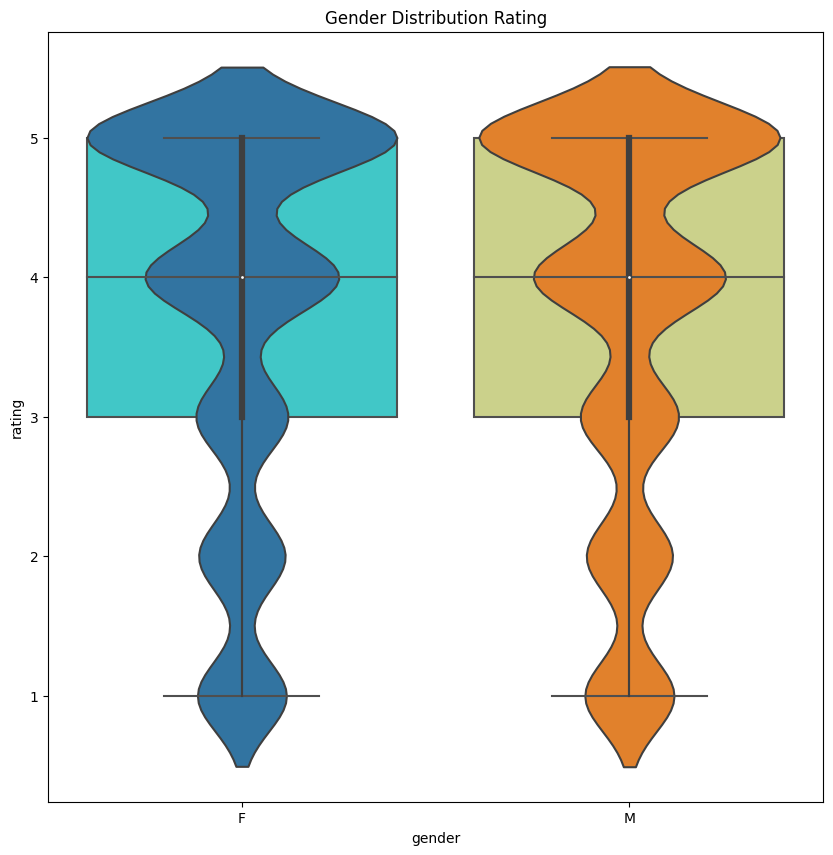

In [10]:
# your code and solutions
# I used seaborn supplementary plugin as I noticed that I was easier for me to use it in contrast to using matplot
import seaborn as sns

#Gender and Rating
plt.figure(figsize=(10,10))
sns.boxplot(data = tempEpinionsDF, x = "gender", y="rating", palette='rainbow')
sns.violinplot(data = tempEpinionsDF, x = "gender", y="rating", jitter=True, dodge=True)
plt.title("Gender Distribution Rating")
#Comments:
# it is noticed that there is symetric distribution. The medians of the samples are nearly equal. Neither sample contains any outliers. 


Text(0.5, 1.0, 'Gender Distribution Helpfullness')

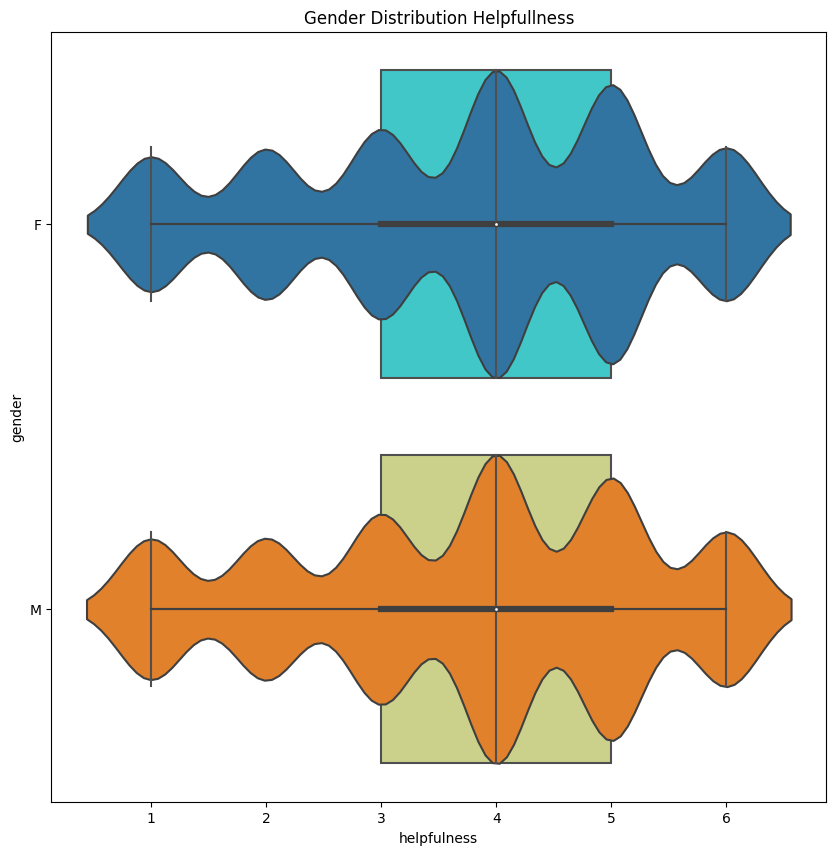

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(data = tempEpinionsDF, x = "helpfulness", y="gender", palette='rainbow')
sns.violinplot(data = tempEpinionsDF, x = "helpfulness", y="gender")
plt.title("Gender Distribution Helpfullness")
#Comments:
# it is noticed that there is symetric distribution. The medians of the samples are nearly equal. Neither sample contains any outliers. 

Text(0.5, 1.0, 'Category Distibution of Rating')

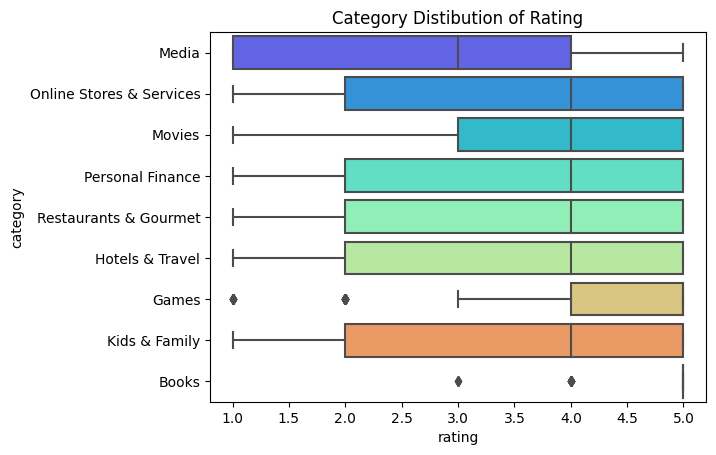

In [12]:
# plt.figure(figsize=(10,10))
sns.boxplot(data = tempEpinionsDF, x = "rating", y="category", palette='rainbow')
# sns.violinplot(data = tempEpinionsDF, x = "rating", y="category")
plt.title("Category Distibution of Rating")
#Comments
#There are outliers under Games and Books category. Books category garnered or enjoyed the 5 numerical rating at most. Media on the other hand, plays between 1 - 4 rating. It could be assumed
#also that the customers had a bad time with the category media.

Text(0.5, 1.0, 'Category Distibution of helpfullness')

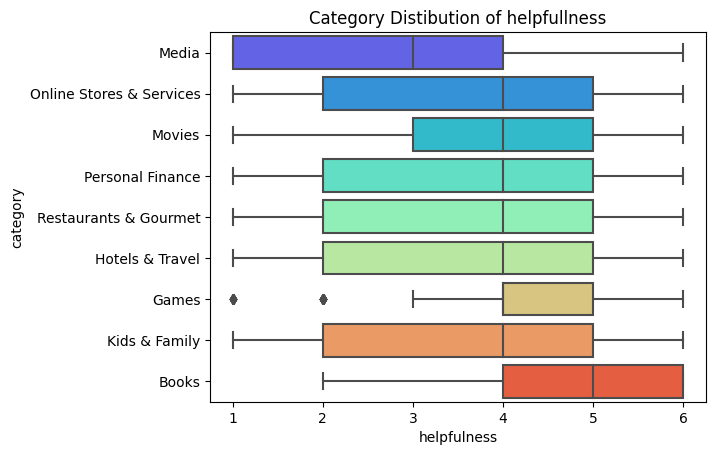

In [13]:
# plt.figure(figsize=(10,10))
sns.color_palette("Spectral", as_cmap=True)
sns.boxplot(data = tempEpinionsDF, x = "helpfulness", y="category", palette='rainbow')
plt.title("Category Distibution of helpfullness")
#There are outliers under Games category, relatively for the helpfullness feature. Books category garnered or enjoyed the 6 numerical helpfullness at most.
# Media on the other hand, plays between 1 - 4 rating. It could be assumed also that the customers had a bad time with the category media.

#### Q4. Detect and remove outliers

We may define outlier users and items with three rules:

* users whose helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users and items. After that, __print the length of the data__.

In [14]:
# your code and solutions
#Filter for the helpfulness
outlierDF =  tempEpinionsDF.groupby(['userId']).describe()
# noMoreThanTwo = outlierDF[outlierDF["helpfulness"]["count"] > 2]
noMoreThanTwo = outlierDF[outlierDF["helpfulness"]["mean"] > 2]
noMoreThanTwoList = noMoreThanTwo.copy()

#Filter for the users
usersRating = outlierDF[outlierDF["rating"]["count"] > 7]
# usersRating

#Create a DF for the item
itemOutlierDF =  tempEpinionsDF.groupby(['item']).describe()
itemFilter = itemOutlierDF[itemOutlierDF["rating"]["count"] >  11]

In [15]:
#Convert the dataframe to a list

#Helpfulness is not more than 2
tempNoMoreThanTwoList = noMoreThanTwoList.index
tempNoMoreThanTwoList = tempNoMoreThanTwoList.to_list()
# print(len(tempNoMoreThanTwoList))

# Users who rate les than 7 items
tempUsersRating = usersRating.index
tempUsersRating = tempUsersRating.to_list()
# print(len(tempUsersRating))

#items that receives less than 11 ratings
tempItemFilter = itemFilter.index
tempItemFilter = tempItemFilter.to_list()
# print(len(tempItemFilter))

In [16]:
#copy the dataframe that are cleaned (with no nulls)
filteredDF = tempEpinionsDF.copy()

#Filter now using the lists created above using the ID and item name
filteredDF = filteredDF[filteredDF.userId.isin(tempNoMoreThanTwoList)]
filteredDF = filteredDF[filteredDF.userId.isin(tempUsersRating)]
filteredDF = filteredDF[filteredDF.item.isin(tempItemFilter)]

#FilteredDF is the final dataframe with filtered outliers
print(len(filteredDF))

1849
